In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

In [9]:
# load the data
AMRKennlinien = np.loadtxt('data/AMR_Kennlinie.lvm')
dfAMRKennlinien=pd.DataFrame({'x_Strom': AMRKennlinien[:,0],
                                   'y_Ausgangsspannung': AMRKennlinien[:,1]})

In [10]:
# define the linear regression model and fit the model with selected data
lrModel = LinearRegression()
x = dfAMRKennlinien['x_Strom'].values.reshape(-1, 1)
y = dfAMRKennlinien['y_Ausgangsspannung'].values.reshape(-1, 1)
lrModel.fit(x,y)

print('model score: ', lrModel.score(x, y))
print('coefficient: ', lrModel.coef_ )
print('intercept: ', lrModel.intercept_)

model score:  0.9973175558048937
coefficient:  [[-0.00723227]]
intercept:  [2.49913469]


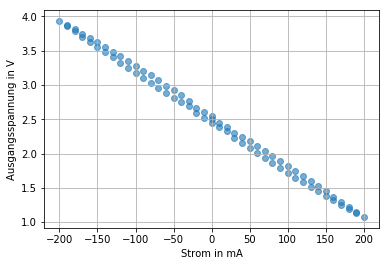

In [20]:
plt.grid()
# plot the original data as blue points
plt.scatter(x, y, alpha=0.6)

# plot the data from fitted model as red line
# predicts = lrModel.predict(x)
# plt.plot(x, predicts, color = 'r', alpha = 0.6)


plt.xlabel('Strom in mA')
plt.ylabel('Ausgangsspannung in V')
plt.savefig('output/AMR_Kennlinien.eps', format = 'eps', dpi = 100)
plt.show()

In [12]:
B_ext = x * -0.097 - 0.008
# define the linear regression model and fit the model with selected data
lrModel_BV = LinearRegression()
x_BV = B_ext
y_BV = dfAMRKennlinien['y_Ausgangsspannung'].values.reshape(-1, 1)
lrModel_BV.fit(x_BV,y_BV)

print('model score: ', lrModel_BV.score(x, y))
print('coefficient: ', lrModel_BV.coef_ )
print('intercept: ', lrModel_BV.intercept_)

model score:  -126.55937575427316
coefficient:  [[0.07455947]]
intercept:  [2.49973117]


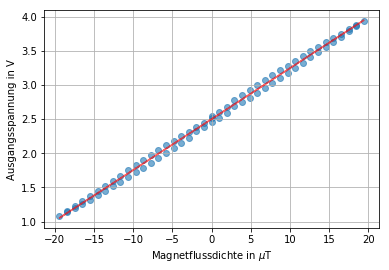

In [19]:
plt.grid()
# plot the original data as blue points
plt.scatter(B_ext, y, alpha=0.6)

# plot the data from fitted model as red line
predicts = lrModel_BV.predict(B_ext)
plt.plot(B_ext, predicts, color = 'r', alpha = 0.6)


plt.xlabel('Magnetflussdichte in $\mu \mathrm{T}$')
plt.ylabel('Ausgangsspannung in V')
plt.savefig('output/AMR_Kennlinien_BV.eps', format = 'eps', dpi = 100)
plt.show()

In [14]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_BV, predicts)))  

Root Mean Squared Error: 0.04306914779212331
